## 1. Can we use Bagging for regression problems?


Yes, Bagging can be used for regression problems. A common example is the `BaggingRegressor` in `sklearn.ensemble`, which reduces variance and improves prediction stability by averaging multiple base regressors.


#### 2. Difference between multiple model training and single model training
- **Single Model Training**: One model learns from the entire dataset, prone to overfitting.
- **Multiple Model Training**: Several models are trained on different subsets and aggregated to improve generalization.


#### 3. Feature Randomness in Random Forest
Feature randomness ensures that each tree in the forest does not consider all features, improving diversity. Each split in a tree considers a random subset of features instead of all features.

#### 4. What is OOB (Out-of-Bag) Score?
OOB score is an internal validation technique in Bagging, where each tree is tested on samples that were not used in its training (out-of-bag samples).



In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Train Random Forest with OOB score
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X_train, y_train)
print("OOB Score:", rf.oob_score_)

OOB Score: 0.9166666666666666


#### 5. Feature Importance in Random Forest
Random Forest ranks features based on their contribution to reducing impurity.


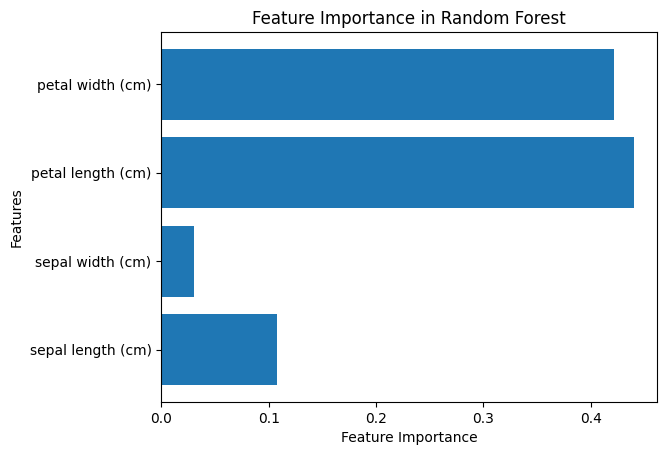

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances
importances = rf.feature_importances_
features = iris.feature_names

# Plot
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()


#### 6. Working Principle of a Bagging Classifier
A Bagging Classifier trains multiple models on bootstrapped subsets and aggregates their predictions (majority voting for classification).

#### 7. Evaluating a Bagging Classifier’s Performance
- Accuracy, Precision, Recall, and F1-score can be used.
- Cross-validation can further ensure robustness.

#### 8. How does a Bagging Regressor work?
It trains multiple regressors and averages their outputs to reduce variance.

#### 9. Main Advantage of Ensemble Techniques
They reduce overfitting and improve prediction accuracy by combining multiple models.

#### 10. Main Challenge of Ensemble Methods
- Computationally expensive
- Difficult to interpret compared to single models

#### 11. Key Idea Behind Ensemble Techniques
Combine multiple weak learners to create a strong predictive model.

#### 12. What is a Random Forest Classifier?
A collection of Decision Trees trained on random subsets with feature randomness.

#### 13. Main Types of Ensemble Techniques
- Bagging (Bootstrap Aggregating)
- Boosting (AdaBoost, Gradient Boosting)
- Stacking

#### 14. What is Ensemble Learning in Machine Learning?
It is a technique where multiple models work together to enhance overall performance.

#### 15. When Should We Avoid Using Ensemble Methods?
- When interpretability is critical
- When computational power is limited

#### 16. How Does Bagging Help in Reducing Overfitting?
By averaging predictions, it reduces model variance while maintaining low bias.

#### 17. Why is Random Forest Better than a Single Decision Tree?
- Less prone to overfitting
- More stable and generalizable

#### 18. Role of Bootstrap Sampling in Bagging
It ensures diversity in training data by sampling with replacement.

#### 19. Real-World Applications of Ensemble Techniques
- Fraud detection
- Medical diagnosis
- Stock market prediction
- Image recognition

#### 20. Difference Between Bagging and Boosting
- **Bagging**: Reduces variance by training models independently.
- **Boosting**: Reduces bias by sequentially improving weak models.

In [3]:
## Practical Questions:

In [4]:
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestClassifier, RandomForestRegressor, StackingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression, make_classification, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix, precision_recall_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data for classification and regression
X_cls, y_cls = make_classification(n_samples=1000, n_features=10, random_state=42)
X_reg, y_reg = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# 1. Train a Bagging Classifier using Decision Trees
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_clf.fit(X_train_cls, y_train_cls)
predictions = bagging_clf.predict(X_test_cls)
print("Bagging Classifier Accuracy:", accuracy_score(y_test_cls, predictions))



Bagging Classifier Accuracy: 0.885


In [5]:
# 2. Train a Bagging Regressor using Decision Trees
bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
bagging_reg.fit(X_train_reg, y_train_reg)
reg_predictions = bagging_reg.predict(X_test_reg)
print("Bagging Regressor MSE:", mean_squared_error(y_test_reg, reg_predictions))


Bagging Regressor MSE: 352.90146531571503


In [6]:
# 3. Train a Random Forest Classifier on Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_bc, y_train_bc)
print("Feature Importances:", rf_clf.feature_importances_)



Feature Importances: [0.04870337 0.01359088 0.05326975 0.04755501 0.00728533 0.01394433
 0.06800084 0.10620999 0.00377029 0.00388577 0.02013892 0.00472399
 0.01130301 0.02240696 0.00427091 0.00525322 0.00938583 0.00351326
 0.00401842 0.00532146 0.07798688 0.02174901 0.06711483 0.15389236
 0.01064421 0.02026604 0.0318016  0.14466327 0.01012018 0.00521012]


In [7]:
# 4. Train a Random Forest Regressor and compare with Decision Tree
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_reg, y_train_reg)
dt_mse = mean_squared_error(y_test_reg, dt_reg.predict(X_test_reg))
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
rf_mse = mean_squared_error(y_test_reg, rf_reg.predict(X_test_reg))
print("Decision Tree MSE:", dt_mse)
print("Random Forest MSE:", rf_mse)



Decision Tree MSE: 1225.3445311046783
Random Forest MSE: 283.1874552460186


In [8]:
# 5. Compute OOB Score for a Random Forest Classifier
rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_oob.fit(X_train_cls, y_train_cls)
print("OOB Score:", rf_oob.oob_score_)



OOB Score: 0.90625


In [9]:
# 6. Train a Bagging Classifier using SVM
bagging_svm = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42)
bagging_svm.fit(X_train_cls, y_train_cls)
print("Bagging SVM Accuracy:", accuracy_score(y_test_cls, bagging_svm.predict(X_test_cls)))

Bagging SVM Accuracy: 0.825


In [10]:
# 7. Train Random Forest Classifier with different tree numbers
n_estimators = [10, 50, 100, 200]
for n in n_estimators:
    rf_temp = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_temp.fit(X_train_cls, y_train_cls)
    print(f"Random Forest ({n} trees) Accuracy:", accuracy_score(y_test_cls, rf_temp.predict(X_test_cls)))

Random Forest (10 trees) Accuracy: 0.865
Random Forest (50 trees) Accuracy: 0.885
Random Forest (100 trees) Accuracy: 0.88
Random Forest (200 trees) Accuracy: 0.88


In [11]:
# 8. Train a Bagging Classifier using Logistic Regression and print AUC score
bagging_lr = BaggingClassifier(estimator=LogisticRegression(), n_estimators=10, random_state=42)
bagging_lr.fit(X_train_cls, y_train_cls)
print("Bagging Logistic Regression AUC:", roc_auc_score(y_test_cls, bagging_lr.predict_proba(X_test_cls)[:,1]))

Bagging Logistic Regression AUC: 0.911529507035125


In [12]:
# 9. Train a Stacking Classifier
stacking_clf = StackingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('svm', SVC(probability=True)), ('lr', LogisticRegression())], final_estimator=LogisticRegression())
stacking_clf.fit(X_train_cls, y_train_cls)
print("Stacking Classifier Accuracy:", accuracy_score(y_test_cls, stacking_clf.predict(X_test_cls)))



Stacking Classifier Accuracy: 0.87


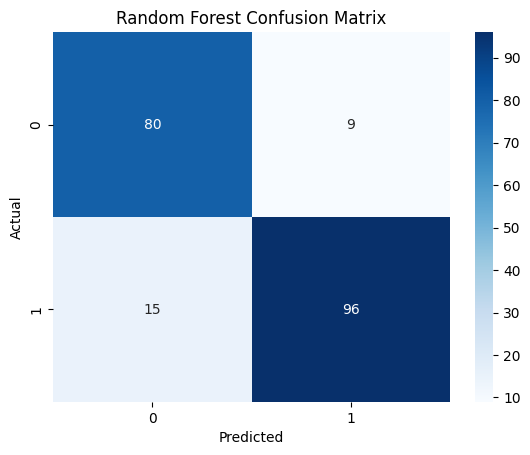

In [13]:
# 10. Train Random Forest and visualize Confusion Matrix
rf_conf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_conf.fit(X_train_cls, y_train_cls)
y_pred_conf = rf_conf.predict(X_test_cls)
cm = confusion_matrix(y_test_cls, y_pred_conf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()



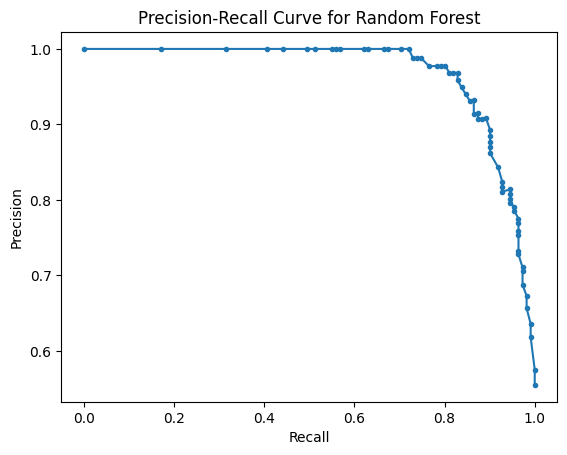

In [14]:
# 11. Train a Random Forest Classifier and plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_cls, rf_conf.predict_proba(X_test_cls)[:,1])
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Random Forest")
plt.show()


In [15]:
########Practical Answers ###############

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, StackingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer Dataset
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train a Bagging Classifier using Decision Trees
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred))


Bagging Classifier Accuracy: 0.956140350877193


In [20]:
# 2. Train a Bagging Regressor using Decision Trees
X_reg = np.random.rand(100, 5)
y_reg = np.random.rand(100)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
bagging_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = bagging_reg.predict(X_test_reg)
print("Bagging Regressor MSE:", mean_squared_error(y_test_reg, y_pred_reg))

Bagging Regressor MSE: 0.08611535033584576


In [21]:
# 3. Train a Random Forest Classifier and print feature importance
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
print("Feature Importances:", rf_clf.feature_importances_)

Feature Importances: [0.04870337 0.01359088 0.05326975 0.04755501 0.00728533 0.01394433
 0.06800084 0.10620999 0.00377029 0.00388577 0.02013892 0.00472399
 0.01130301 0.02240696 0.00427091 0.00525322 0.00938583 0.00351326
 0.00401842 0.00532146 0.07798688 0.02174901 0.06711483 0.15389236
 0.01064421 0.02026604 0.0318016  0.14466327 0.01012018 0.00521012]


In [22]:
# 4. Train a Random Forest Regressor and compare with Decision Tree
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
dt_reg = DecisionTreeRegressor(random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
dt_reg.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_reg.predict(X_test_reg)
y_pred_dt = dt_reg.predict(X_test_reg)
print("Random Forest MSE:", mean_squared_error(y_test_reg, y_pred_rf))
print("Decision Tree MSE:", mean_squared_error(y_test_reg, y_pred_dt))


Random Forest MSE: 0.07755802048284646
Decision Tree MSE: 0.11952152936083316


In [23]:
# 5. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier
oob_clf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
oob_clf.fit(X_train, y_train)
print("OOB Score:", oob_clf.oob_score_)



OOB Score: 0.9560439560439561


In [24]:
# 6. Train a Bagging Classifier using SVM as base estimator
bagging_svm = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42)
bagging_svm.fit(X_train, y_train)
y_pred_svm = bagging_svm.predict(X_test)
print("Bagging SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


Bagging SVM Accuracy: 0.9473684210526315


In [25]:
# 7. Train a Random Forest Classifier with different numbers of trees and compare accuracy
n_estimators_list = [10, 50, 100, 200]
for n in n_estimators_list:
    rf_temp = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_temp.fit(X_train, y_train)
    y_pred_temp = rf_temp.predict(X_test)
    print(f"Random Forest ({n} trees) Accuracy:", accuracy_score(y_test, y_pred_temp))


Random Forest (10 trees) Accuracy: 0.956140350877193
Random Forest (50 trees) Accuracy: 0.9649122807017544
Random Forest (100 trees) Accuracy: 0.9649122807017544
Random Forest (200 trees) Accuracy: 0.9649122807017544


In [26]:
# 8. Train a Bagging Classifier using Logistic Regression as base estimator and print AUC score
bagging_logreg = BaggingClassifier(estimator=LogisticRegression(), n_estimators=10, random_state=42)
bagging_logreg.fit(X_train, y_train)
y_pred_prob = bagging_logreg.predict_proba(X_test)[:, 1]
print("Bagging Logistic Regression AUC Score:", roc_auc_score(y_test, y_pred_prob))


Bagging Logistic Regression AUC Score: 0.9980347199475925


/opt/homebrew/Cellar/jupyterlab/4.3.5/libexec/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Cellar/jupyterlab/4.3.5/libexec/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [ ]:
# 9. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy
max_depth_list = [5, 10, 20, None]
for depth in max_depth_list:
    rf_depth = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf_depth.fit(X_train, y_train)
    y_pred_depth = rf_depth.predict(X_test)
    print(f"Random Forest (max_depth={depth}) Accuracy:", accuracy_score(y_test, y_pred_depth))
